<a href="https://colab.research.google.com/github/msboralugoda/Pattern-Recognition/blob/main/EN3150_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Linear regression impact on outliers

Least Squares (sklearn): y = -3.557x + 3.917


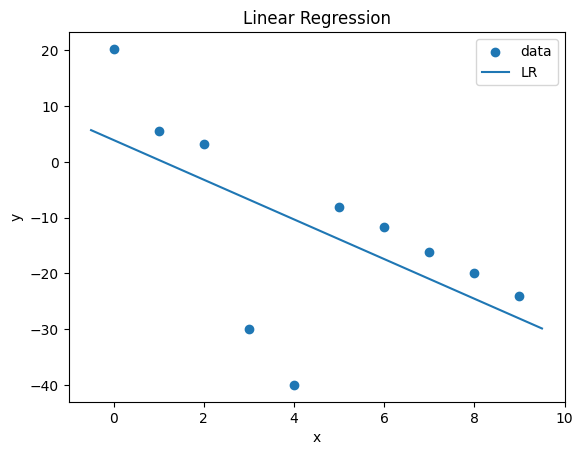

In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
x = np.array([0,1,2,3,4,5,6,7,8,9], dtype=float)
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03], dtype=float)

# Fit LS model
lr = LinearRegression().fit(x.reshape(-1,1), y)
a_ls = lr.coef_[0]
b_ls = lr.intercept_
print(f"Least Squares (sklearn): y = {a_ls:.3f}x + {b_ls:.3f}")

# Plot
xs = np.linspace(x.min()-0.5, x.max()+0.5, 300)
plt.scatter(x, y, label="data")
plt.plot(xs, a_ls*xs + b_ls, label="LR")

plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.title("Linear Regression")
plt.show()

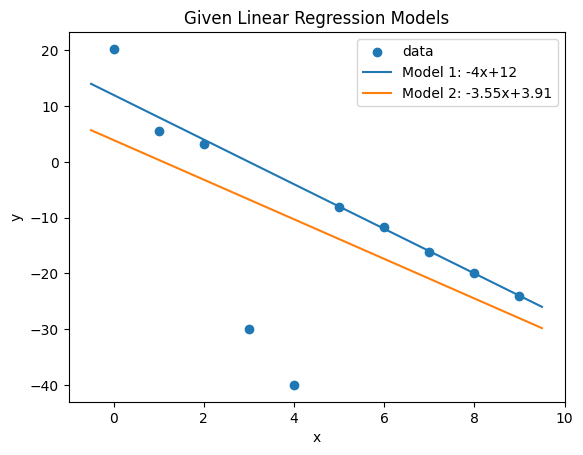

In [12]:
plt.scatter(x, y, label="data")

# Given two models
def m1(x): return -4*x + 12
def m2(x): return -3.55*x + 3.91
# Plot the given models
plt.plot(xs, m1(xs), label="Model 1: -4x+12")
plt.plot(xs, m2(xs), label="Model 2: -3.55x+3.91")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.title("Given Linear Regression Models")
plt.show()

In [13]:
import numpy as np

def robust_loss(y_true, y_pred, beta):
    r2 = (y_true - y_pred)**2
    return np.mean(r2 / (r2 + beta**2))

betas = [1.0, 1e-6, 1e3]
yhat_m1 = m1(x)
yhat_m2 = m2(x)

for beta in betas:
    L1 = robust_loss(y, yhat_m1, beta)
    L2 = robust_loss(y, yhat_m2, beta)
    print(f"beta={beta:g} | L(Model1)={L1:.6f}  L(Model2)={L2:.6f}")


beta=1 | L(Model1)=0.435416  L(Model2)=0.972847
beta=1e-06 | L(Model1)=1.000000  L(Model2)=1.000000
beta=1000 | L(Model1)=0.000227  L(Model2)=0.000188


#  2 Loss Function

True y  y_hat     MSE         BCE
     1   0.005    0.990025    5.298317
     1   0.010    0.980100    4.605170
     1   0.050    0.902500    2.995732
     1   0.100    0.810000    2.302585
     1   0.200    0.640000    1.609438
     1   0.300    0.490000    1.203973
     1   0.400    0.360000    0.916291
     1   0.500    0.250000    0.693147
     1   0.600    0.160000    0.510826
     1   0.700    0.090000    0.356675
     1   0.800    0.040000    0.223144
     1   0.900    0.010000    0.105361
     1   1.000    0.000000   -0.000000


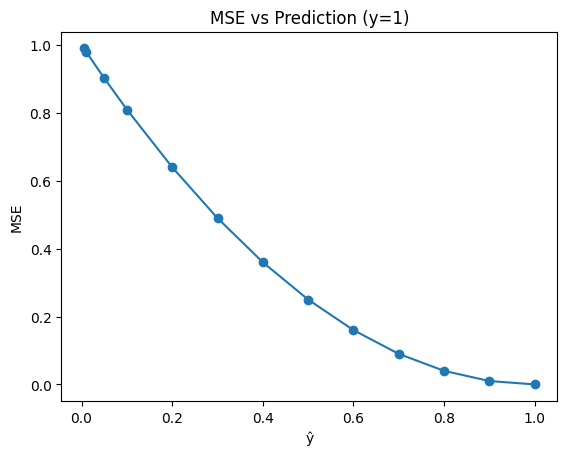

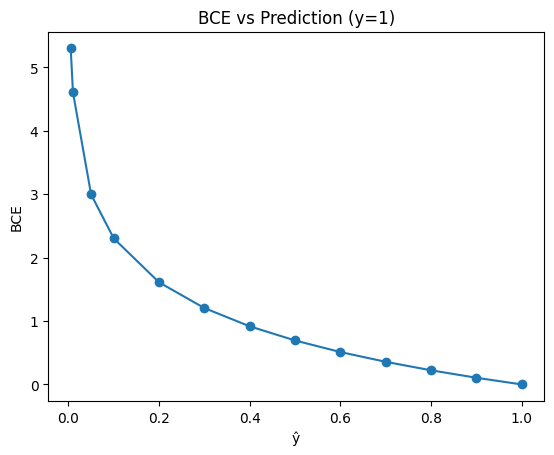

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Given: y = 1
y_true = 1.0
yhat = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                 0.6, 0.7, 0.8, 0.9, 1.0], dtype=float)

# MSE = (y - yhat)^2  (for a single y, n=1)
mse = (y_true - yhat)**2

# BCE for y=1 is -log(yhat); clip to avoid log(0)
eps = 1e-12
bce = -np.log(np.clip(yhat, eps, 1.0))

# Nicely formatted table to paste in the report
print("True y  y_hat     MSE         BCE")
for yh, m, b in zip(yhat, mse, bce):
    print(f"{1:6d}  {yh:6.3f}  {m:10.6f}  {b:10.6f}")

# Plots (two separate figures, as typically expected)
plt.plot(yhat, mse, marker='o')
plt.xlabel("ŷ"); plt.ylabel("MSE"); plt.title("MSE vs Prediction (y=1)")
plt.show()

plt.plot(yhat, bce, marker='o')
plt.xlabel("ŷ"); plt.ylabel("BCE"); plt.title("BCE vs Prediction (y=1)")
plt.show()


In [15]:
from sklearn.metrics import mean_squared_error, log_loss
print("MSE check:", mean_squared_error([1]*len(yhat), yhat))
print("BCE check:", log_loss([1]*len(yhat), yhat, labels=[0,1]))


MSE check: 0.4402019230769231
BCE check: 1.6015890909965431


## 3 Data pre-processing

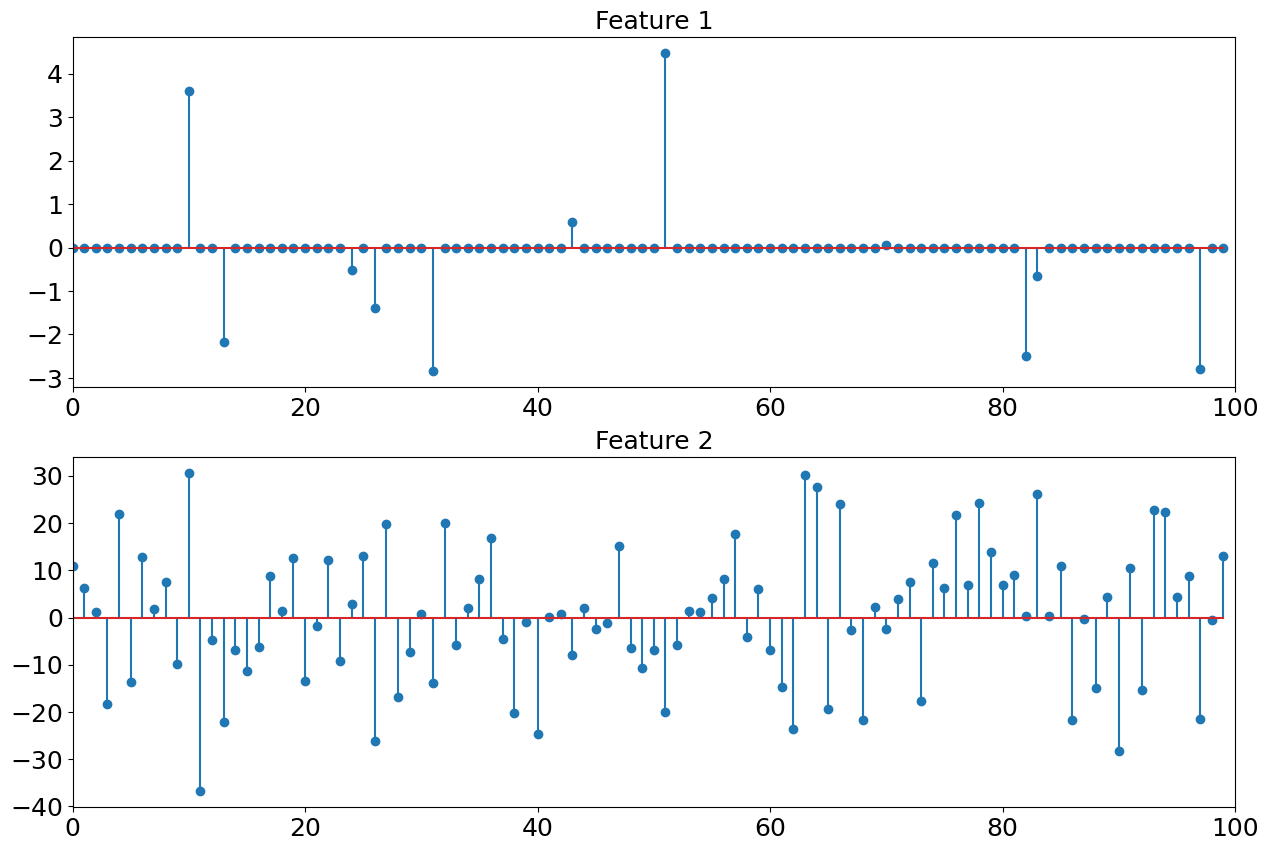

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):

  signal = np.zeros(signal_length)
  nonzero_indices = np.random.choice(signal_length, num_nonzero,
  replace=False)
  nonzero_values = 10*np.random.randn(num_nonzero)
  signal[nonzero_indices] = nonzero_values

  return signal


signal_length = 100 # Total length of the signal
num_nonzero = 10 # Number of non-zero elements in the signal
your_index_no= 220074
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10)*2 + 10

if your_index_no % 10 == 0:
  sparse_signal[10] = np.random.randn(1) + 30
sparse_signal=sparse_signal/5
epsilon = np.random.normal(0, 15, signal_length )


#epsilon=epsilon[:, np.newaxis]
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.show()